#Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential

from sklearn.metrics import confusion_matrix, classification_report

#Data reading

In [5]:
df = pd.read_csv('/content/gender_classification_v7.csv')

In [6]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


#Data descovery

In [214]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [216]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [217]:
df.duplicated().sum()

1768

In [218]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [219]:
df['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

#EDA

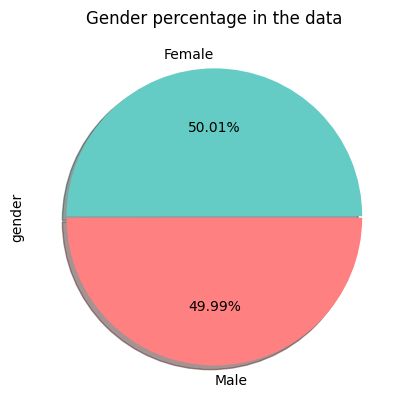

In [7]:
# Understanding the gender percentage
df['gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',explode=[0,0.01],
    labels=['Female','Male'],
    colors=['#64CCC5', '#FF8080'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Gender percentage in the data")
plt.show()


In [221]:
male= df[df['gender'] == 'Male']
female = df[df['gender'] == 'Female']

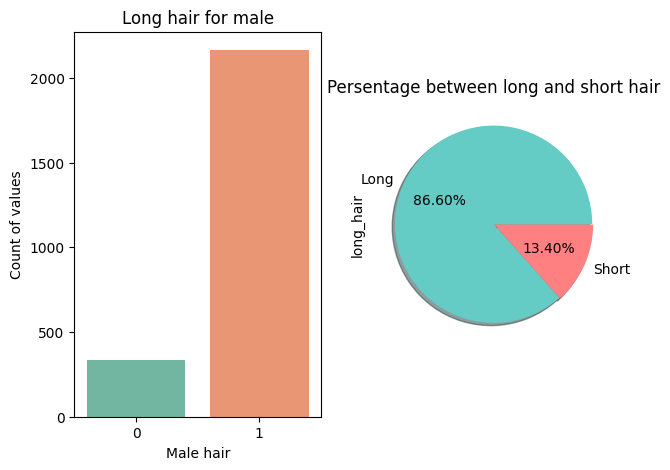

In [222]:
# Create a 2x1 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 5))

# Plot the first chart on the first subplot
sns.countplot(data=male, x='long_hair', palette='Set2', ax=axes[0])
axes[0].set_title("Long hair for male")
axes[0].set_xlabel("Male hair")
axes[0].set_ylabel("Count of values")

# Plot the second chart on the second subplot
male['long_hair'].value_counts().sort_values(ascending=False)\
    .plot(kind='pie', explode=[0, 0.01],
          labels=['Long', 'Short'],
          colors=['#64CCC5', '#FF8080'],
          autopct='%1.2f%%',
          shadow=True, ax=axes[1])
axes[1].set_title("Persentage between long and short hair")

# Adjust spacing betwee

# Show the combined figure
plt.show()


In [223]:
male

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
...,...,...,...,...,...,...,...,...
4987,1,12.1,6.2,1,1,1,1,Male
4992,1,14.1,7.0,1,1,1,1,Male
4994,1,12.9,7.0,1,1,1,1,Male
4995,1,12.3,6.9,0,1,1,1,Male


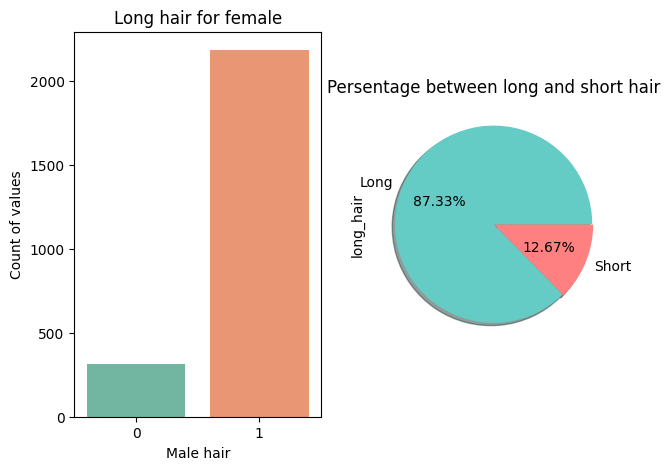

In [224]:
# Create a 2x1 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 5))

# Plot the first chart on the first subplot
sns.countplot(data=female, x='long_hair', palette='Set2', ax=axes[0])
axes[0].set_title("Long hair for female")
axes[0].set_xlabel("Male hair")
axes[0].set_ylabel("Count of values")

# Plot the second chart on the second subplot
female['long_hair'].value_counts().sort_values(ascending=False)\
    .plot(kind='pie', explode=[0, 0.01],
          labels=['Long', 'Short'],
          colors=['#64CCC5', '#FF8080'],
          autopct='%1.2f%%',
          shadow=True, ax=axes[1])
axes[1].set_title("Persentage between long and short hair")

# Adjust spacing betwee

# Show the combined figure
plt.show()

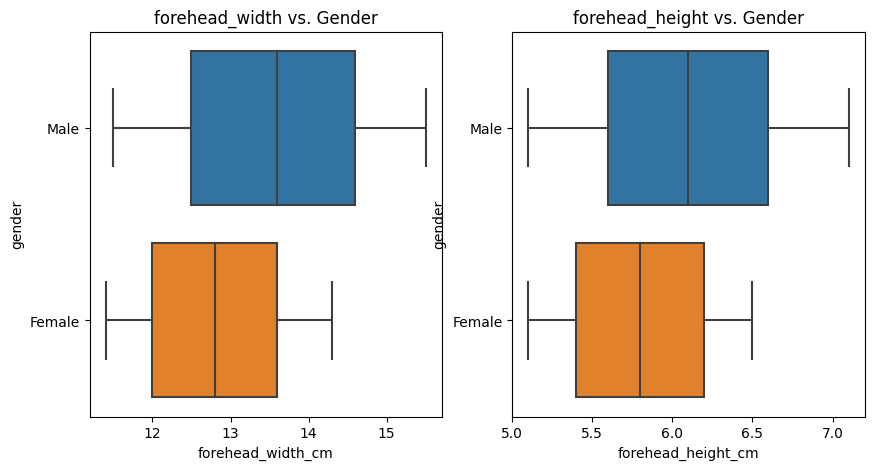

In [225]:
# Create a 2x1 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=df, x='forehead_width_cm', y='gender', ax=axes[0])
axes[0].set_title("forehead_width vs. Gender")

sns.boxplot(data=df, x='forehead_height_cm', y='gender', ax=axes[1])
axes[1].set_title("forehead_height vs. Gender")


plt.show()

In [226]:
#Employment by education and gender


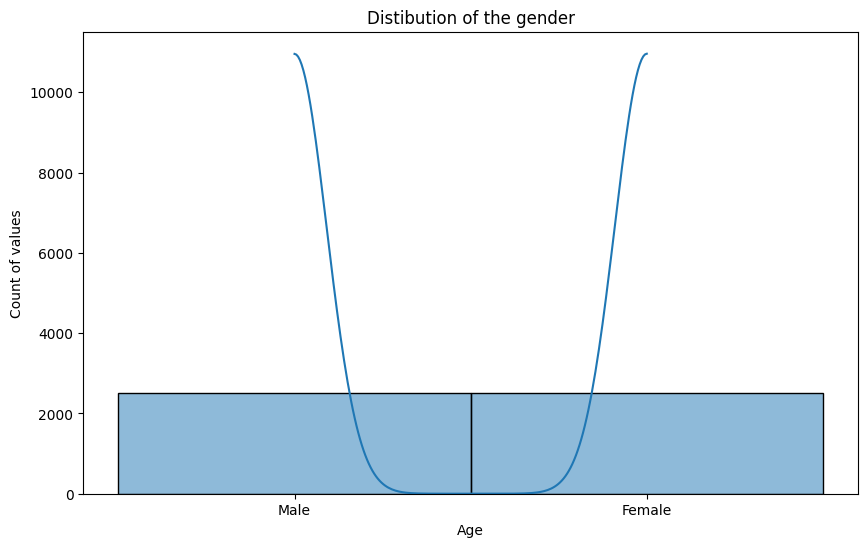

In [227]:
#Employemnt by age
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='gender',bins=20,kde=True)
plt.title("Distibution of the gender")
plt.xlabel("Age")
plt.ylabel("Count of values")
plt.show()

#Data cleaning

In [242]:
# Convert the 'gender' column to numerical values (0 for male, 1 for female)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [243]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


#Trainig/Testing

In [244]:
# Split the data into X and Y
X = df.drop('gender', axis=1)
y = df['gender']

In [245]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [246]:
# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Model

In [247]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

In [248]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [249]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 2s 6ms/step - loss: 0.4648 - accuracy: 0.8441 - val_loss: 0.2248 - val_accuracy: 0.9750
Epoch 2/20
100/100 [==============================] - 0s 4ms/step - loss: 0.1572 - accuracy: 0.9628 - val_loss: 0.0933 - val_accuracy: 0.9700
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.9653 - val_loss: 0.0716 - val_accuracy: 0.9675
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9669 - val_loss: 0.0675 - val_accuracy: 0.9663
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9678 - val_loss: 0.0647 - val_accuracy: 0.9663
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9697 - val_loss: 0.0636 - val_accuracy: 0.9675
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 0.9703 - val_loss: 0.0646 - val_accuracy: 0.9700
Epoch 

#Accuracy

In [250]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

32/32 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9640
Test accuracy: 96.40%


#Confusion Matrix

In [251]:
# Make predictions
predictions = model.predict(X_test)

# Convert predictions to labels (0 or 1)
predicted_labels = np.round(predictions)


32/32 [==============================] - 0s 1ms/step


In [252]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[475  24]
 [ 12 490]]


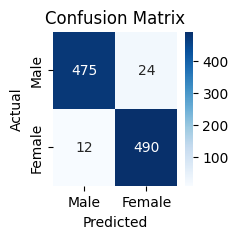


Classification Report:
              precision    recall  f1-score   support

        Male       0.98      0.95      0.96       499
      Female       0.95      0.98      0.96       502

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [253]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print a classification report for additional metrics
report = classification_report(y_test, predicted_labels, target_names=["Male", "Female"])
print("\nClassification Report:")
print(report)
